In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

import calendar

In [2]:
# Read data from locally stored CSV.  The CSV file is from Kaggle.
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


### Data Dictionary:

#### Hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)

#### is_canceled: Value indicating if the booking was canceled (1) or not (0)

#### lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

#### arrival_date_year: Year of arrival date

#### arrival_date_month: Month of arrival date

#### arrival_date_week_number: Week number of year for arrival date

#### arrival_date_day_of_month: Day of arrival date

#### stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

#### stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

#### adults: Number of adults

#### children: Number of children

#### babies: Number of babies

#### meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

#### country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

#### market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

#### is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

#### previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

#### previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

#### reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

#### assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

#### booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

#### deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

#### agent: ID of the travel agency that made the booking

#### company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

#### days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

#### customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

#### adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

#### required_car_parking_spaces: Number of car parking spaces required by the customer

#### total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

#### reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

#### Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Data Dictionary Thoughts:
### Possible data collection recommendation: These do not appear to be associated to a particular customer/account number.  This could be useful in indentifying possible cancellation patterns.

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
train, test = train_test_split(df, test_size=0.25, random_state=4321)

In [6]:
train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,89542.000000,89542.000000,89542.00000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89539.000000,89542.00000,89542.000000,89542.000000,89542.000000,89542.000000,77290.000000,5100.000000,89542.000000,89542.000000,89542.000000,89542.000000
mean,0.370474,104.150644,2016.15682,27.193116,15.808023,0.926459,2.500614,1.855643,0.103608,0.00822,0.031750,0.088651,0.138516,0.220880,86.539255,189.075098,2.288044,101.841198,0.062563,0.572636
std,0.482934,107.142053,0.70756,13.601093,8.772713,0.994781,1.896936,0.558082,0.397335,0.10114,0.175336,0.879275,1.505409,0.648817,110.726227,131.660506,17.313138,51.412031,0.245929,0.792967
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.360000,0.000000,0.000000
50%,0.000000,69.000000,2016.00000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.780000,0.000000,0.000000
75%,1.000000,160.000000,2017.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,19.000000,50.000000,50.000000,3.000000,10.00000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## What stands out from the describe?
### There is a max lead time of 737 days!  Do hotels even allow that?  Is that a good data point?
### Someone stayed 19 weekend nights.  Did this person/family stay stay for 10-11 weeks?  Looking at stays_in_week_nights, this seems plausible as a 50 weekday stretch would be 10 weeks.
### 50 adults in a single room? 10 children?  10 babies?
### \\$5,400 for an average daily rate?
### 8 Parking spots?

### Someone averaged -\\$6.38/night?

# Some feature engineering:
## Create an arrival date:

In [7]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
train['month'] = train.arrival_date_month.map(d)
train.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
97746,City Hotel,0,34,2016,September,39,18,2,0,0,...,9.0,NaN,0,Transient-Party,124.25,0,1,Check-Out,2016-09-20,9
69923,City Hotel,1,169,2017,June,23,8,0,3,2,...,19.0,NaN,0,Transient,170.00,0,0,Canceled,2016-12-21,6
44675,City Hotel,0,53,2015,October,41,9,1,2,2,...,9.0,NaN,0,Contract,94.50,0,0,Check-Out,2015-10-12,10


In [8]:
train.rename(columns={'arrival_date_year': 'year', 'arrival_date_day_of_month': 'day'}, inplace=True)
train['arrival_date'] = pd.to_datetime(train[['year', 'month' , 'day']])

## Create an arrival day of week.  This will be used to replace rows that have 0's in both stays in weekend or weekday nights:

In [9]:
train['arrival_day_of_week'] = [x.dayofweek for x in train.arrival_date]

## Create a boolean column indicating whether the arrival date was a weekday or weekend:

In [10]:
train['arrival_day_is_weekend'] = np.where(train['arrival_day_of_week'] >= 5, 1, 0)

## Create a column where previous bookings canceled is divided by the sum of cancels and non-cancels, or total visits:

In [11]:
train['cancel_rate'] = train['previous_cancellations'] / \
    (train['previous_cancellations'] + train['previous_bookings_not_canceled'])

train['cancel_rate'].fillna(0, inplace=True)

train[train.cancel_rate > 0].head(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,arrival_date,arrival_day_of_week,arrival_day_is_weekend,cancel_rate
81084,City Hotel,1,7,2015,December,49,5,0,1,2,...,119.0,0,3,Canceled,2015-12-03,12,2015-12-05,5,1,1.0
81915,City Hotel,1,181,2016,May,19,5,2,4,2,...,90.0,0,0,Canceled,2015-12-18,5,2016-05-05,3,0,1.0
75911,City Hotel,1,274,2015,July,29,18,2,2,2,...,62.0,0,0,Canceled,2015-07-06,7,2015-07-18,5,1,1.0


## Create a column for total number of guests:

In [12]:
# Replacing 0's with 1's in the adult column on the assumption 
# that an adult must check in and use the room.
train['adults'].replace({0:1}, inplace=True) 

In [13]:
train['total_guests'] = train['adults'] + train['children'] + train['babies']
train[train['total_guests'] > 1].head()

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,arrival_date,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests
97746,City Hotel,0,34,2016,September,39,18,2,0,1,...,0,1,Check-Out,2016-09-20,9,2016-09-18,6,1,0.0,3.0
69923,City Hotel,1,169,2017,June,23,8,0,3,2,...,0,0,Canceled,2016-12-21,6,2017-06-08,3,0,0.0,2.0
44675,City Hotel,0,53,2015,October,41,9,1,2,2,...,0,0,Check-Out,2015-10-12,10,2015-10-09,4,0,0.0,2.0
78751,City Hotel,0,1,2015,October,42,14,0,2,2,...,0,0,Check-Out,2015-10-16,10,2015-10-14,2,0,0.0,2.0
97061,City Hotel,0,33,2016,September,37,10,1,1,2,...,0,0,Check-Out,2016-09-12,9,2016-09-10,5,1,0.0,2.0


## Create a column for total number of days, which is the sum of stays_in_week_nights and stays_in_weekend_nights:

In [14]:
train['total_nights_stay'] = train['stays_in_week_nights'] + train['stays_in_weekend_nights']

In [15]:
train[['total_nights_stay', 'stays_in_week_nights', 'stays_in_weekend_nights']]\
    [train['total_nights_stay'] <= 0].groupby('total_nights_stay').count()

,stays_in_week_nights,stays_in_weekend_nights
total_nights_stay,,
0,545,545


In [16]:
train.loc[((train['total_nights_stay'] == 0) & (train['arrival_day_is_weekend'] == 0))\
          , 'stays_in_week_nights' ] = 1

In [17]:
train.loc[((train['total_nights_stay'] == 0) & (train['arrival_day_is_weekend'] == 1))\
          , 'stays_in_weekend_nights' ] = 1

In [18]:
# Redo total_nights_stay column:
train['total_nights_stay'] = train['stays_in_week_nights'] + train['stays_in_weekend_nights']

## Create a total \$ Amount column:

In [19]:
train['total_dollar'] = train['total_nights_stay'] * train['adr']

## Create a column summing previous cancellations and non-cancellations:

In [20]:
train['total_previous_bookings'] = train['previous_cancellations'] + train['previous_bookings_not_canceled']

# Some validation:
## With this new 'cancel_rate' column, my thought is that someone that is not a repeat guest (0), should have only a 0.0 in the cancel_rate column.

In [21]:
train[['is_repeated_guest', 'cancel_rate']].groupby('is_repeated_guest').agg(['min', 'max'])

cancel_rate     
                          min  max
is_repeated_guest                 
0                         0.0  1.0
1                         0.0  1.0

## That's not the case.  Looking below, it looks like there are just over 4,100 guests that have previous visits that are labeled as 0, or not a repeat guest:

In [22]:
# If a guest has previously cancelled, they will considered a repeat guest.
# Showing 3 rows where the customer has 100% previous cancellations, 
# but is not listed as a repeat guest (0).
print(train['is_repeated_guest'][(train.is_repeated_guest == 0) & (train.cancel_rate > 0)].count())

train[['previous_cancellations','previous_bookings_not_canceled', 'is_repeated_guest', \
       'cancel_rate']][(train.is_repeated_guest == 0) & (train.cancel_rate > 0)].head(3)

4113


,previous_cancellations,previous_bookings_not_canceled,is_repeated_guest,cancel_rate
81084,1,0,0,1.0
81915,1,0,0,1.0
75911,1,0,0,1.0


In [23]:
# Double checking, here are examples where the guest is not a repeat guest, but show
# both previous cancellations and previous stays.
train[['previous_cancellations','previous_bookings_not_canceled', 'is_repeated_guest', 'cancel_rate']]\
    [(train.is_repeated_guest == 0) & (train.cancel_rate > 0) & (train.cancel_rate < 1)].tail(3)

,previous_cancellations,previous_bookings_not_canceled,is_repeated_guest,cancel_rate
14261,1,3,0,0.250000
13960,2,11,0,0.153846
13881,1,8,0,0.111111


In [24]:
# This is simliar to above.
train[['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']]\
    [(train['is_repeated_guest'] == 0) & ((train['previous_cancellations'] > 0) \
    & (train['previous_bookings_not_canceled'] > 0))].head()

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
14291,0,2,9
83094,0,3,4
80059,0,11,25
13962,0,2,13
14473,0,1,1


In [25]:
# Aggregating guest listed as non repeat guests that have both previous cancellations
# and stays.  Grouping into reservation status to make sure that they do not all fit
# into a single value.
train[['is_repeated_guest', 'reservation_status', 'previous_cancellations', 'previous_bookings_not_canceled']]\
    [(train['is_repeated_guest'] == 0)\
    & ((train['previous_cancellations'] > 0) & (train['previous_bookings_not_canceled'] > 0))]\
    .groupby(['is_repeated_guest', 'reservation_status']).count()

previous_cancellations  \
is_repeated_guest reservation_status                           
0                 Canceled                                23   
                  Check-Out                               50   
                  No-Show                                  1   

                                      previous_bookings_not_canceled  
is_repeated_guest reservation_status                                  
0                 Canceled                                        23  
                  Check-Out                                       50  
                  No-Show                                          1

## I'm headed down a rabbit hole here.  There are customers that have checked out but are not repeat customers.  I will change any customer with a cancel_rate > 0 to a 1 in the is_repeated_guest column.  Any customer with 0 total bookings will be changed to 0 in the is_repeated_guest column as well.  This might fix a lot.

In [26]:
print('There are {} rows where the customer is listed as a repeated guest, \
    but they have 0 previous bookings. \nHere are the first 5 rows:'\
    .format(train[['previous_cancellations','previous_bookings_not_canceled', \
    'is_repeated_guest', 'cancel_rate']][(train.is_repeated_guest == 1) \
    & (train.previous_cancellations == 0) & (train.previous_bookings_not_canceled == 0)].shape[0]))

train[['previous_cancellations','previous_bookings_not_canceled', 'is_repeated_guest', 'cancel_rate']]\
    [(train.is_repeated_guest == 1) & (train.previous_cancellations == 0)\
    & (train.previous_bookings_not_canceled == 0)].head()

There are 448 rows where the customer is listed as a repeated guest,     but they have 0 previous bookings. 
Here are the first 5 rows:


,previous_cancellations,previous_bookings_not_canceled,is_repeated_guest,cancel_rate
101186,0,0,1,0.0
98490,0,0,1,0.0
19983,0,0,1,0.0
108176,0,0,1,0.0
77409,0,0,1,0.0


In [27]:
# Checking a few rows where the customer is listed as a previous guest but 
# has no previous reservation.
train[(train.is_repeated_guest == 1) & (train.previous_cancellations == 0) \
      & (train.previous_bookings_not_canceled == 0)].head(10).T

,101186,98490,19983,108176,77409,89101,24767,112971,100284,16517
hotel,City Hotel,City Hotel,Resort Hotel,City Hotel,City Hotel,City Hotel,Resort Hotel,City Hotel,City Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,0,0
lead_time,0,0,0,0,19,0,0,0,0,0
year,2016,2016,2016,2017,2015,2016,2016,2017,2016,2016
arrival_date_month,November,September,January,March,October,May,June,May,October,October
arrival_date_week_number,46,40,3,12,41,21,23,22,44,45
day,8,30,12,24,6,17,2,31,26,30
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,1
stays_in_week_nights,1,1,1,1,3,1,1,2,1,0
adults,1,1,1,2,2,2,2,1,1,2


## Similarly, there are rows where the customer has no previous cancel or non-cancel event, but they are labeled as a repeat customer.  I pulled all columns for the first 5 observations to check things like reservation_status (maybe these were all canceled due to an input error).  Some of these have a reservation_status of Check-Out, indicating the party checked in, stayed the night, and then departed.  Another observation from this: someone checked out, but stayed 0 nights...?  The two observations with 0 nights also have 0 adr.

In [28]:
# The columns for number of nights stayed have been adjusted to reflect
# at least 1 night for either weekend or weeknight check-in.
print('There are {} rows where the total nights stayed are 0 or less.'\
      .format(train['total_nights_stay'][train.total_nights_stay <=0].count()))

train[['is_canceled', 'reservation_status', 'total_nights_stay','adr']]\
    [train['total_nights_stay'] <= 0].groupby(['is_canceled', 'reservation_status',\
    'total_nights_stay'], as_index=False).agg(['min', 'max', 'count'])


There are 0 rows where the total nights stayed are 0 or less.


Empty DataFrame
Columns: [(adr, min), (adr, max), (adr, count)]
Index: []

## Are the observations above all of the stays where ADR <= 0?  Looking below, that's the not the case.  There are a lot of people staying with 0 ADR.  The initial thought is that these customers are using reward points or some sort of voucher for their stay.

In [29]:
print('There are {} rows where the ADR is <= 0.  \nThis means there are {} more rows than above.'\
    .format(train['adr'][train['adr'] <= 0].count(),\
    (train['adr'][train['adr'] <= 0].count() - train['total_nights_stay']\
     [train.total_nights_stay <=0].count())))

train[['is_canceled', 'reservation_status', 'total_nights_stay','adr']]\
    [train['adr'] <= 0].groupby(['is_canceled', 'reservation_status','total_nights_stay']\
    , as_index=False).agg(['min', 'max', 'count'])


There are 1497 rows where the ADR is <= 0.  
This means there are 1497 more rows than above.


adr           
                                                   min  max count
is_canceled reservation_status total_nights_stay                 
0           Check-Out          1                  0.00  0.0   880
                               2                  0.00  0.0   244
                               3                  0.00  0.0    96
                               4                  0.00  0.0    38
                               5                  0.00  0.0    20
                               6                  0.00  0.0    13
                               7                  0.00  0.0    13
                               8                  0.00  0.0     9
                               9                  0.00  0.0     3
                               10                -6.38  0.0     3
                               11                 0.00  0.0     1
                               12                 0.00  0.0     2
                               13                 0.00  0.0     1
                               14                 0.00  0.0     3
                               15                 0.00  0.0     2
                               22                 0.00  0.0     1
                               27                 0.00  0.0     1
                               29                 0.00  0.0     2
                               30                 0.00  0.0     1
                               43                 0.00  0.0     1
                               46                 0.00  0.0     1
                               49                 0.00  0.0     1
1           Canceled           1                  0.00  0.0    63
                               2                  0.00  0.0    34
                               3                  0.00  0.0    14
                               4                  0.00  0.0    14
                               6                  0.00  0.0     4
                               7                  0.00  0.0    12
            No-Show            1                  0.00  0.0    18
                               2                  0.00  0.0     1
                               3                  0.00  0.0     1

In [30]:
# Total nights stay was adjusted, so this should return nothing.
train[['total_nights_stay', 'reservation_status', 'adr','is_canceled']][train['total_nights_stay'] == 0]\
    .groupby(['total_nights_stay', 'reservation_status','is_canceled']).agg(['count', 'min', 'max'])

Empty DataFrame
Columns: [(adr, count), (adr, min), (adr, max)]
Index: []

## Changing values based on logic:

In [31]:
# Where the customer is listed as a repeated guest, but has no previous bookings
# they will be changed to 0.
train['is_repeated_guest'] = np.where(train['total_previous_bookings'] == 0\
                            , 0, train['is_repeated_guest'])

In [32]:
# Where the customer is listed as a first time guest, but has previous bookings
# they will be changed to 1.
train['is_repeated_guest'] = np.where(train['total_previous_bookings'] > 0\
                            , 1, train['is_repeated_guest'])

In [33]:
# Checking guests listed as first time guests to make sure they have only 0
# in the cancel_rate column.
train[['is_repeated_guest', 'cancel_rate']][train['is_repeated_guest'] == 0]\
    .groupby('is_repeated_guest').agg(['min','max'])

cancel_rate     
                          min  max
is_repeated_guest                 
0                         0.0  0.0

In [34]:
# Previous cancellations should be all 0's for customers with a 0 in cancel_rate.  
# Checking the sum to confirm.
train[['previous_cancellations']][train['cancel_rate'] == 0].sum()

previous_cancellations    0
dtype: int64

In [35]:
#Change min ADR to 0.  $0 a night is feasible based on a rewards program.
#I don't like the thought of a customer receving money for their stay.  
#I think that's a data issue.
train['adr'] = train['adr'].clip(lower=0.0)

# Looking at Null's:

In [36]:
train.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
year                                       int64
arrival_date_month                        object
arrival_date_week_number                   int64
day                                        int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [37]:
# Taking a look at null counts and percentages of columns that are null
data = {'null_count': train.isnull().sum(), 'null_percent': (train.isnull().sum()/train.shape[0]) * 100}
train_nulls = pd.DataFrame(data=data)
train_nulls[train_nulls['null_count'] > 0].sort_values(by='null_count', ascending=False)

,null_count,null_percent
company,84442,94.304349
agent,12252,13.682964
country,364,0.406513
children,3,0.003350
total_guests,3,0.003350


## Company is almost all Null values.  This will most likely be dropped.
## Children has only 3 rows with Nulls.  Let's replace those with 0 and then 
## recreate the total guests column so those rows are filled with the
## totals of adults and babies.

In [38]:
train['children'].fillna(0, inplace=True)
train['total_guests'] = train['adults'] + train['children'] + train['babies']
train[train['total_guests'] > 1].head()

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,month,arrival_date,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests,total_nights_stay,total_dollar,total_previous_bookings
97746,City Hotel,0,34,2016,September,39,18,2,0,1,...,2016-09-20,9,2016-09-18,6,1,0.0,3.0,2,248.5,0
69923,City Hotel,1,169,2017,June,23,8,0,3,2,...,2016-12-21,6,2017-06-08,3,0,0.0,2.0,3,510.0,0
44675,City Hotel,0,53,2015,October,41,9,1,2,2,...,2015-10-12,10,2015-10-09,4,0,0.0,2.0,3,283.5,0
78751,City Hotel,0,1,2015,October,42,14,0,2,2,...,2015-10-16,10,2015-10-14,2,0,0.0,2.0,2,201.6,0
97061,City Hotel,0,33,2016,September,37,10,1,1,2,...,2016-09-12,9,2016-09-10,5,1,0.0,2.0,2,171.0,0


In [39]:
data = {'null_count': train.isnull().sum(), 'null_percent': (train.isnull().sum()/train.shape[0]) * 100}
train_nulls = pd.DataFrame(data=data)
train_nulls[train_nulls['null_count'] > 0].sort_values(by='null_count', ascending=False)

,null_count,null_percent
company,84442,94.304349
agent,12252,13.682964
country,364,0.406513


In [40]:
# Looking at unique value counts in numeric columns.  This can be useful to detect continuous 
# variable columns and categorical.  Integers are sometimes used as an encoded value for
# categorical columns.

# Make a list of numeric column names
numeric_cols = list(train.select_dtypes(include=['float64', 'int64']))

# Make an empty dataframe to house the results of the unique counts
numeric_nunique_counts = pd.DataFrame(columns=['col_name', 'nunique_count'])

# A loop to count the unique values in a column and then append the results to the empty dataframe above.
# Finally, we sort the new dataframe by the count descending in order to find the higher unique count
# columns first.
for col in numeric_cols:
    numeric_nunique_counts = numeric_nunique_counts.append({'col_name': str(col), 'nunique_count': train[col].nunique()} ,ignore_index=True)
numeric_nunique_counts.sort_values(by=['nunique_count'], ascending=False)

,col_name,nunique_count
6,total_dollar,12289
3,adr,7703
2,company,328
1,agent,317
4,cancel_rate,95
5,total_guests,12
0,children,4


In [41]:
# Arrival month is the word value.  Let's create a column for the integer value to create an arrival date column.
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
train['month'] = train.arrival_date_month.map(d)
train.head(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,month,arrival_date,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests,total_nights_stay,total_dollar,total_previous_bookings
97746,City Hotel,0,34,2016,September,39,18,2,0,1,...,2016-09-20,9,2016-09-18,6,1,0.0,3.0,2,248.5,0
69923,City Hotel,1,169,2017,June,23,8,0,3,2,...,2016-12-21,6,2017-06-08,3,0,0.0,2.0,3,510.0,0
44675,City Hotel,0,53,2015,October,41,9,1,2,2,...,2015-10-12,10,2015-10-09,4,0,0.0,2.0,3,283.5,0


In [42]:
# Combine the year, month, and day to create an arrival date column and convert it to datetime.
train.rename(columns={'arrival_date_year': 'year', 'arrival_date_day_of_month': 'day'}, inplace=True)
train['arrival_date'] = pd.to_datetime(train[['year', 'month' , 'day']])

# Set the new date to the index
train = train.set_index('arrival_date')
train.head(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,month,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests,total_nights_stay,total_dollar,total_previous_bookings
arrival_date,,,,,,,,,,,,,,,,,,,,,
2016-09-18,City Hotel,0,34,2016,September,39,18,2,0,1,...,Check-Out,2016-09-20,9,6,1,0.0,3.0,2,248.5,0
2017-06-08,City Hotel,1,169,2017,June,23,8,0,3,2,...,Canceled,2016-12-21,6,3,0,0.0,2.0,3,510.0,0
2015-10-09,City Hotel,0,53,2015,October,41,9,1,2,2,...,Check-Out,2015-10-12,10,4,0,0.0,2.0,3,283.5,0


## ADR looks to be a continuous variable.  Let's get an idea of the distribution.

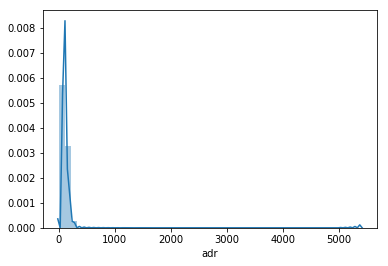

In [43]:
ax = sns.distplot(train.adr)

## A quick glance of ADR shows that most people were paying less than \\$500/night.  This column is skewed right because of some fancy villas maybe.  If these are taken out, there might be more of an even distribution.

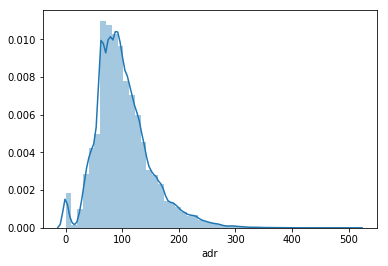

In [44]:
ax = sns.distplot(train['adr'][train.adr<1000])

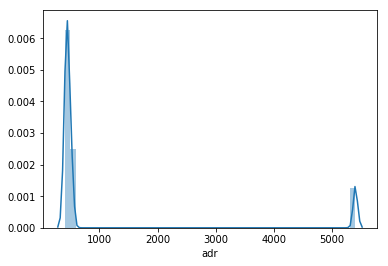

In [45]:
ax = sns.distplot(train['adr'][train.adr>400])

In [46]:
train[['hotel','adr']].query('adr > 400').sort_values(by='adr')

,hotel,adr
arrival_date,,
2017-08-17,Resort Hotel,402.00
2017-08-01,Resort Hotel,426.25
2017-08-13,Resort Hotel,437.00
2017-08-01,Resort Hotel,450.00
2016-12-31,City Hotel,451.50
2015-07-15,Resort Hotel,508.00
2017-05-09,City Hotel,510.00
2016-03-25,City Hotel,5400.00


## This looks a lot better.  We can still see a spike of values hovering around or below 0 and what looks to be a few possible outliers on the higher end.

In [47]:
object_cols = list(train.select_dtypes(include=['object']))
object_nunique_counts = pd.DataFrame(columns=['col_name', 'nunique_count'])
for col in object_cols:
    object_nunique_counts = object_nunique_counts.append({'col_name': str(col), 'nunique_count': train[col].nunique()} ,ignore_index=True)
object_nunique_counts.sort_values(by=['nunique_count'], ascending=False)

,col_name,nunique_count
11,reservation_status_date,917
3,country,172
1,arrival_date_month,12
7,assigned_room_type,11
6,reserved_room_type,10
4,market_segment,8
2,meal,5
5,distribution_channel,5
9,customer_type,4
8,deposit_type,3


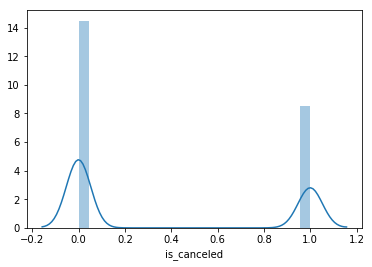

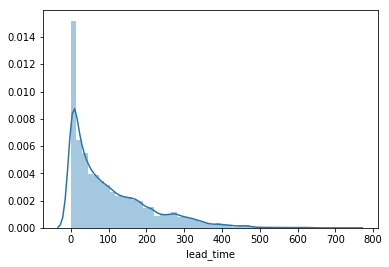

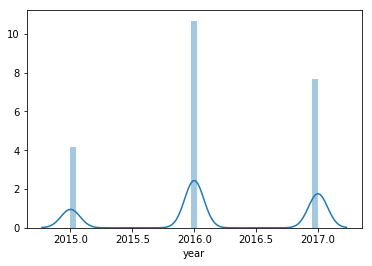

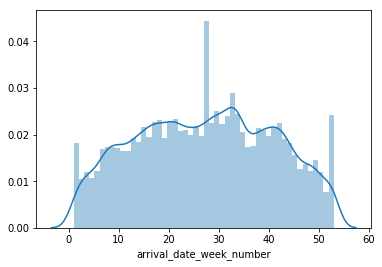

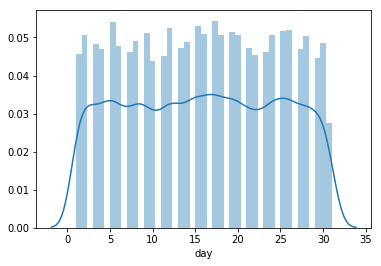

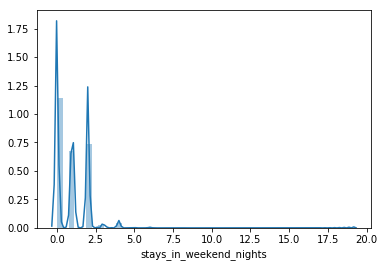

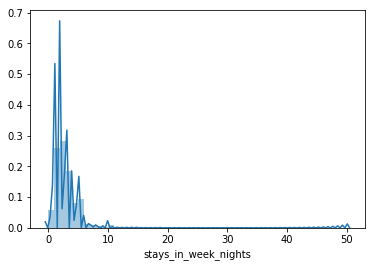

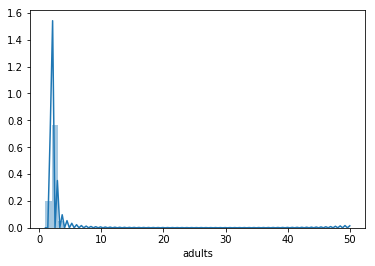

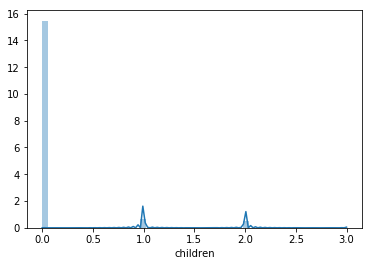

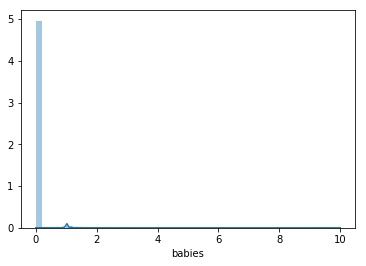

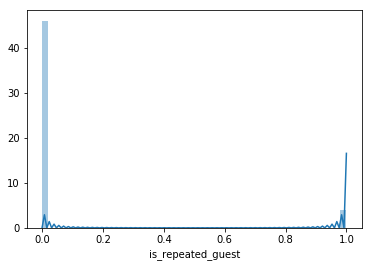

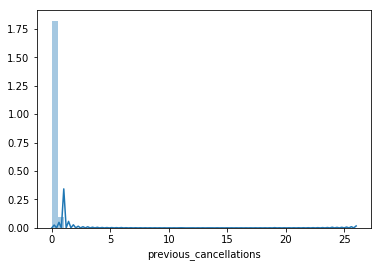

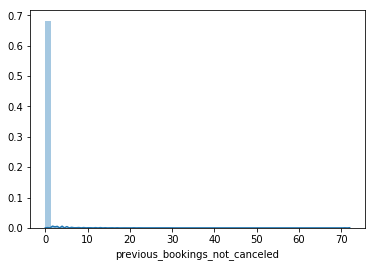

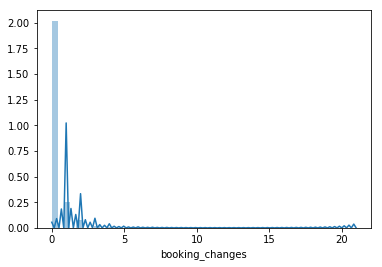

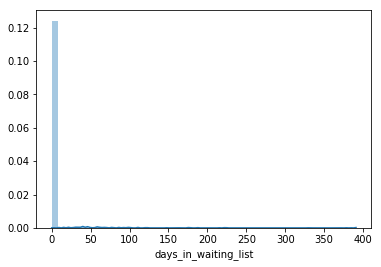

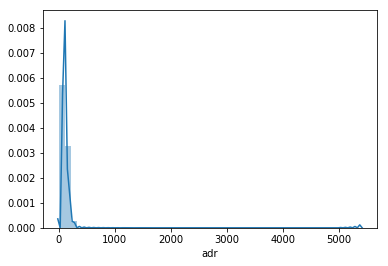

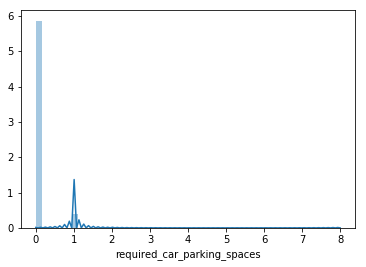

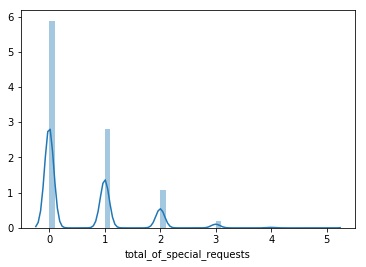

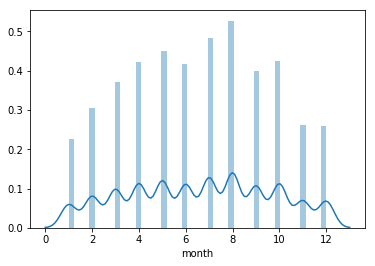

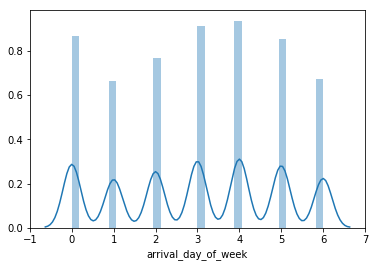

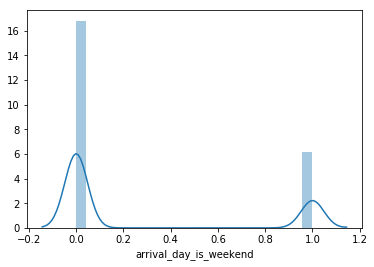

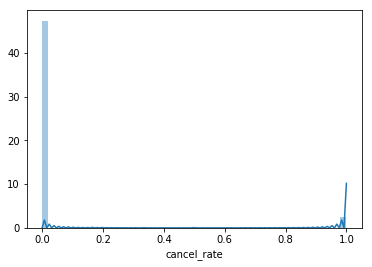

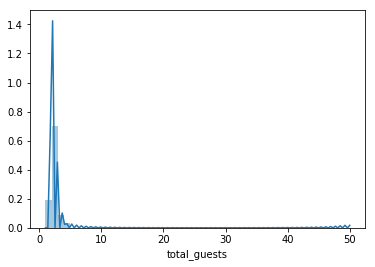

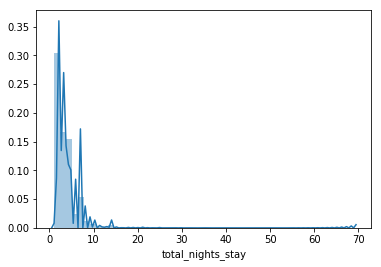

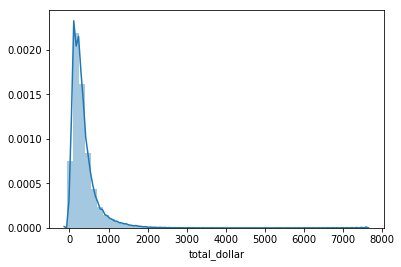

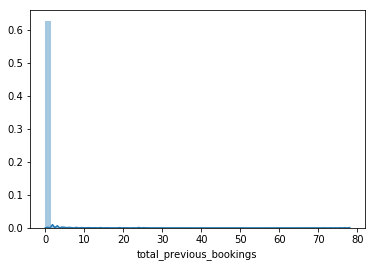

In [48]:
train1 = train.dropna(axis=1).select_dtypes(['number'])

for i, col in enumerate(train1.columns):
    plt.figure(i)
    sns.distplot(train[col])

In [49]:
# train1 = train.select_dtypes([np.int, np.float])

# for i, col in enumerate(train1.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=train1)

## There's a lot to look at here:
### I'm a little surprised at the ratio of not canceled to canceled.
### Arrival date week and arrive date year pair together.  At first glance of the week chart, I'd say there are a lot more booking in summer months.  After looking at the year distribution, I wonder if 2015 didn't start until Fall and 2017 records ended in Fall, which could drive up the values for weeks in warmer months.

In [50]:
train.sort_index().head(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,month,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests,total_nights_stay,total_dollar,total_previous_bookings
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,City Hotel,0,257,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,7,2,0,0.0,2.0,2,203.0,0
2015-07-01,City Hotel,0,257,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,7,2,0,0.0,2.0,2,203.0,0
2015-07-01,City Hotel,0,257,2015,July,27,1,0,2,1,...,Check-Out,2015-07-03,7,2,0,0.0,1.0,2,160.0,0


In [51]:
train.sort_index().tail(3)

,hotel,is_canceled,lead_time,year,arrival_date_month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,month,arrival_day_of_week,arrival_day_is_weekend,cancel_rate,total_guests,total_nights_stay,total_dollar,total_previous_bookings
arrival_date,,,,,,,,,,,,,,,,,,,,,
2017-08-31,City Hotel,1,245,2017,August,35,31,2,3,2,...,Canceled,2017-06-03,8,3,0,0.0,2.0,5,396.00,0
2017-08-31,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,Check-Out,2017-09-10,8,3,0,0.0,3.0,10,897.50,0
2017-08-31,City Hotel,0,63,2017,August,35,31,0,3,3,...,Check-Out,2017-09-03,8,3,0,0.0,3.0,3,585.99,0


## Above shows that the arrival dates do range from July 1, 2015 through August 31, 2017.  This supports that there is an overlap in certain week numbers, which would lead to higher counts for those week.  Weeks 28-35 are in all 3 years (28 is a partial week in 2015 and 35 is a partial week in 2017).  The other weeks will only be in 2 years.

## The suspense is killing me.  Let's look at the big spender.  Is it Oprah or Celine Dion (Forgetting Sarah Marshall reference)?

In [52]:
train[train.adr == train.adr.max()].T

arrival_date,2016-03-25 00:00:00
hotel,City Hotel
is_canceled,1
lead_time,35
year,2016
arrival_date_month,March
arrival_date_week_number,13
day,25
stays_in_weekend_nights,0
stays_in_week_nights,1
adults,2


## Above, we know that 'Hotel' has only 2 unique values.  This particular reservation seems odd, like maybe a data quality issue.  Let's look at the number of reservations where ADR exceeded \$1,000. 

## Something to remember is that I don't see something that indicates a cancellation is only on the customer end.  A cancellation could possibly be on the hotel end, due to an input error.  Noting the reason for cancellation could be a recommendation for data colletion, possibly a drop down menu to limit the unique values.

## Let's drop this observation with a while loop that says while the max ADR is double the second highest, to keep dropping that max.

In [53]:
removed_rows = pd.DataFrame()
while train['adr'].max() >= train['adr'].nlargest(2)[-1:][-1] * 2:
    removed_rows = removed_rows.append(train.loc[train['adr'] == train['adr'].max()])
    train.drop(train['adr'].idxmax(), inplace=True)

In [54]:
removed_rows[['adr']]

,adr
arrival_date,
2016-03-25,5400.0


# Stopping point for next round.

In [55]:
break.breakhere()

SyntaxError: invalid syntax (<ipython-input-55-22b877024754>, line 1)

## Distribution of object type columns:

In [ ]:
# train1 = train.select_dtypes([np.object])

# for i, col in enumerate(train1.columns):
#     plt.figure(i)
#     sns.countplot(x=col, data=train1)

## Notes:
## Almost a 2:1 ratio of city vs resort
## Many of these columns have a large majority of observations in only one of the possible values
## If a model to classify whether or not a customer completed their stay is created, Canceled and No-Show might work best as a combined value.

In [ ]:
Q1 = train['adr'].quantile(0.25)
Q3 = train['adr'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

In [ ]:
bottom_outlier_limit = Q1 - (1.5 * IQR)
upper_outlier_limit = Q3 + 1.5 * IQR
print(bottom_outlier_limit)
print(upper_outlier_limit)

In [ ]:
bottom_ouitliers = train['adr'][train['adr'] < bottom_outlier_limit]
upper_ouitliers = train['adr'][train['adr'] > upper_outlier_limit]
print('Bottom Outliers:')
print(bottom_ouitliers.sort_values())
print('Upper Outliers:')
print(upper_ouitliers[-5:].sort_values())

In [ ]:
upper_outlier_percent = len(upper_ouitliers)/train.shape[0] * 100
print('{upper_outlier_percent}% of oberservations are outliers on the upper end.'.format(upper_outlier_percent=round(upper_outlier_percent,5)))

# Let's plot ADR to visualize outliers:

In [ ]:
train[['adr']].boxplot()

# Looking at ADR by hotel type, there appears to be a higher ADR bubble in City Hotel:

In [ ]:
ax = sns.violinplot(x="hotel", y="adr", data=train)

# Thinking back to the hypothesis that higher lead times might increase the odds of cancelling, let's take a look:

In [ ]:
ax = sns.violinplot(x="reservation_status", y="lead_time", data=train)

# It sure does look like it now.

# Things to consider later:
## The ADR's around or below 0
## What distributions might look like if data is split by hotel
## Long lead times may mean higher probablity of a canceled reservation
## Same thing for no deposit customers

In [ ]:
train_low_adr = train[train['adr'] <= 10]
train_low_adr.shape

In [ ]:
sns.countplot(x=train_low_adr.is_canceled, data=train_low_adr)

In [ ]:
train['adr_bin'] = pd.cut(train['adr'], [train.adr.min()-1, 0, 25, 100, 200, train.adr.max()], labels=['<0', '0-25', '25-100', '100-200', '>200'])

In [ ]:
pd.crosstab(train['adr_bin'][train['adr'] <= 25], train['is_canceled'][train['adr'] <= 25]).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(train['adr_bin'][train['adr'] > 25], train['is_canceled'][train['adr'] > 25]).plot(kind='bar', stacked=True)

In [ ]:
train_adr_bin_perc = pd.DataFrame(1/train[['adr_bin','is_canceled']].groupby('adr_bin').count()).reset_index()

In [ ]:
stacked_data = train[['adr_bin','is_canceled']].merge(pd.DataFrame(1/train[['adr_bin','is_canceled']].groupby('adr_bin').count()).reset_index(), left_on='adr_bin', right_on='adr_bin')
# stacked_data = stacked_data[['adr_bin', 'is_canceled_y']]
# ax = stacked_data.plot.bar(x='adr_bin', y='is_canceled_y')
stacked_data.head()

In [ ]:
stacked_data = stacked_data.groupby(['adr_bin','is_canceled_x']).sum().reset_index()
stacked_data

In [ ]:
stacked_data.groupby(['adr_bin','is_canceled_x']).sum().unstack().plot(kind='bar',stacked=True)

# The very low ADR's seldom cancel.  Could these be reward points users?

In [ ]:
train.head(3)

In [ ]:
# d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
# train['month'] = train.arrival_date_month.map(d)
# train.head(3)

In [ ]:
# train.rename(columns={'arrival_date_year': 'year', 'arrival_date_day_of_month': 'day'}, inplace=True)
# train['arrival_date'] = pd.to_datetime(train[['year', 'month' , 'day']])
# train.dtypes

In [ ]:
# train = train.set_index('arrival_date')
# train.head(3)

In [ ]:
# Checking for missing dates in index
pd.date_range(start= train.index[0], end= train.index[-1]).difference(train.index)

In [ ]:
train['adr'].resample('W').count()

In [ ]:
train = train[train.adr < 1000]

In [ ]:
train_day = train['adr'].resample('D').sum().reset_index()
train_day.set_index('arrival_date', inplace=True)
train_day.head()

In [ ]:
data_columns = ['adr']
data_weekly_mean = train_day[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean.head(10)

In [ ]:
data_7d_rol = train_day[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol.head(10)

In [ ]:
data_365d_rol = train_day[data_columns].rolling(window = 365, center = True).mean()

In [ ]:
import matplotlib.dates as mdates

In [ ]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(train_day['adr'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['adr'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['adr'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('ADR')
ax.set_title('Trends in ADR')

In [ ]:
pd.DataFrame(train.groupby(['hotel', 'is_canceled']).resample('D')[['is_canceled']].count())

In [ ]:
train_day_res = train['is_canceled'][train.hotel == 'Resort Hotel'].resample('D').sum().reset_index()
train_day_res.set_index('arrival_date', inplace=True)
train_day_res.head()

In [ ]:
train_day_city = train['is_canceled'][train.hotel == 'City Hotel'].resample('D').sum().reset_index()
train_day_city.set_index('arrival_date', inplace=True)
train_day_city.head()

In [ ]:
data_columns = ['is_canceled']
data_7d_rol_res = train_day_res[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol_res.head(10)

In [ ]:
data_columns = ['is_canceled']
data_7d_rol_city = train_day_city[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol_city.head(10)

In [ ]:
data_365d_rol_res = train_day_res[data_columns].rolling(window = 365, center = True).mean().reset_index()
data_365d_rol_res.set_index('arrival_date', inplace=True)

In [ ]:
data_365d_rol_city = train_day_city[data_columns].rolling(window = 365, center = True).mean().reset_index()
data_365d_rol_city.set_index('arrival_date', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
# plotting daily data
ax.plot(train_day_city['is_canceled'], marker='.', markersize=3, color='g',linestyle='None', label='Daily City')
ax.plot(train_day_res['is_canceled'], marker='.', markersize=3, color='m',linestyle='None', label='Daily Resort')
# plotting 7-day rolling data
ax.plot(data_7d_rol_city['is_canceled'], color='g', linewidth=2, label='7-d Rolling Mean City')
ax.plot(data_7d_rol_res['is_canceled'], color='m', linewidth=2, label='7-d Rolling Mean Resort')
# plotting annual rolling data
ax.plot(data_365d_rol_city['is_canceled'], color='g', linewidth=3, label='Trend (365-d Rolling Mean) City')
ax.plot(data_365d_rol_res['is_canceled'], color='m', linewidth=3, label='Trend (365-d Rolling Mean) Resort')
# Beautification of plot
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Cancellations')
ax.set_title('Trends in Cancellations')

## The city hotel has more cancellations than the resort.

In [ ]:
train_day_res = train['is_canceled'][(train.hotel == 'Resort Hotel') & (train.is_canceled == 0)].resample('D').count().reset_index()
train_day_res.set_index('arrival_date', inplace=True)
train_day_res.head()

In [ ]:
train_day_city = train['is_canceled'][(train.hotel == 'City Hotel') & (train.is_canceled == 0)].resample('D').count().reset_index()
train_day_city.set_index('arrival_date', inplace=True)
train_day_city.head()

In [ ]:
data_columns = ['is_canceled']
data_7d_rol_res = train_day_res[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol_res.head(10)

In [ ]:
data_columns = ['is_canceled']
data_7d_rol_city = train_day_city[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol_city.head(10)

In [ ]:
data_365d_rol_res = train_day_res[data_columns].rolling(window = 365, center = True).mean().reset_index()
data_365d_rol_res.set_index('arrival_date', inplace=True)

In [ ]:
data_365d_rol_city = train_day_city[data_columns].rolling(window = 365, center = True).mean().reset_index()
data_365d_rol_city.set_index('arrival_date', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
# plotting daily data
ax.plot(train_day_city['is_canceled'], marker='.', markersize=3, color='g',linestyle='None', label='Daily City')
ax.plot(train_day_res['is_canceled'], marker='.', markersize=3, color='m',linestyle='None', label='Daily Resort')
# plotting 7-day rolling data
ax.plot(data_7d_rol_city['is_canceled'], color='g', linewidth=2, label='7-d Rolling Mean City')
ax.plot(data_7d_rol_res['is_canceled'], color='m', linewidth=2, label='7-d Rolling Mean Resort')
# plotting annual rolling data
ax.plot(data_365d_rol_city['is_canceled'], color='g', linewidth=3, label='Trend (365-d Rolling Mean) City')
ax.plot(data_365d_rol_res['is_canceled'], color='m', linewidth=3, label='Trend (365-d Rolling Mean) Resort')
# Beautification of plot
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Check-Ins')
ax.set_title('Trends in Check-Ins')

## The city hotel seems to have a slow season around Jan 1 (excluding what looks to be traffic for New Year's Eve).

In [ ]:
train.columns

In [ ]:
new_year_train = train[((train.month == 12) & (train.day > 24)) | ((train.month == 1) & (train.day <8))].groupby(pd.Grouper(freq='D')).count()

In [ ]:
new_year_train[['hotel']][new_year_train['hotel'] > 0].reset_index().set_index('arrival_date')

In [ ]:
# Sum by day both 0 and 1 in is_canceled and create a ration of total cancels to non-cancels.
# ADR X number of nights (sum weekends and weekdays) for total

In [ ]:
train.head().T

In [ ]:
years = 2015, 2016
train[train.year.isin(years)].tail()

## Experiment 2: Trying to find a way to check if a value is in a sort of hierarchy.  Example below: All values for apple are related to fruit, but fruit has other values that show up under it.  Working on finding a way to find that level up for any value.

In [ ]:
d = {'groupname': ['fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'planet', 'planet', 'planet', 'planet', 'planet', 'planet', 'color', 'color', 'color', 'color', 'color', 'color'], \
     'examplename': ['apple', 'orange', 'banana', 'apple', 'orange', 'banana', 'mars', 'venus', 'pluto - i still count it', 'mars','venus', 'pluto - i still count it', 'orange', 'blue', 'red', 'orange', 'blue', 'red']}
d = pd.DataFrame(data=d)
d

# Updated:

In [ ]:
corr_train = d.select_dtypes(include=['object'])

In [ ]:
for col in corr_train:
    dummy_train = pd.get_dummies(corr_train[col], prefix=col, prefix_sep='_')
    corr_train = pd.concat([corr_train, dummy_train], axis=1)
corr_train.head()

In [ ]:
col_matches = pd.DataFrame(columns=['parent_col','child_col'])
for col in corr_train.select_dtypes(include=['uint8']).columns:
    print('col:'+col)
    corr_train2 = corr_train[corr_train[col] != 0].select_dtypes(include=['uint8'])
    print(corr_train2)
    corr_cols = list(corr_train2.columns)
    corr_train2.reset_index(drop=True, inplace=True)
    for col2 in corr_cols:
        print('checking:'+col2)
        if corr_train2[col].equals(corr_train2[col2]):
            print('**MATCH: '+col2,col)
            match_list = {'parent_col': [col2], 'child_col': [col]}
            matches = pd.DataFrame(data=match_list)
            col_matches = col_matches.append(matches)

In [ ]:
col_matches = col_matches[col_matches['parent_col'] != col_matches['child_col']].sort_values(by=['parent_col','child_col'])

In [ ]:
col_matches

## Added orange to be included in both 'fruit' and 'color' to check results.  Below is a list 'parent' values to the 'child' value that is found under it.  Orange does not show up because it has both 'fruit' and 'color' above it.  

## Next step is to create the hierarchy (First create a third level).  Thought: a value in parent that is not in child is the highest level.  Find those values, then find their child values, and so on.

# Next steps:
## Remove columns with all Nulls
## If col1 == col2: Pass in function to speed up process; Also, if col.nunique() == sum(col)
## Possibly add in, if sum >= 10, and sum of col 2 is 90% of col 1, then put in a separate dataframe to create a train of close matches.  If 3<col1<10, then sum of col2 - 1, possibly.